<a href="https://colab.research.google.com/github/Anisha-Tasneem/CSE499/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/499B-datasets/DatasetNew.csv')

# Preprocessing
data = data.drop(columns=['Customer ID'])

# Convert categorical variables into dummy/indicator variables (if applicable)
data = pd.get_dummies(data, columns=['Gender', 'City Code', 'Product Code'])

# Split features and target variable
X = data.drop(columns=['Customer Value'])
y = data['Customer Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled, X_test_scaled, y_train, y_test are ready to be used for training your DNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error


# Define the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

Epoch 1/50
100/100 [==============================] - 5s 17ms/step - loss: 0.0916 - val_loss: 0.0141
Epoch 2/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0275 - val_loss: 0.0066
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0191 - val_loss: 0.0050
Epoch 4/50
100/100 [==============================] - 1s 12ms/step - loss: 0.0141 - val_loss: 0.0055
Epoch 5/50
100/100 [==============================] - 1s 12ms/step - loss: 0.0125 - val_loss: 0.0033
Epoch 6/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0092 - val_loss: 0.0024
Epoch 7/50
100/100 [==============================] - 1s 11ms/step - loss: 0.0080 - val_loss: 0.0036
Epoch 8/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0074 - val_loss: 0.0030
Epoch 9/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0062 - val_loss: 0.0028
Epoch 10/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0058 - val_loss: 0

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Test Accuracy:", mae)

32/32 [==============================] - 0s 3ms/step
Test Accuracy: 0.02181620242446661


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression report
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')

32/32 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.0006883859392417471
Root Mean Squared Error (RMSE): 0.02623710996359445
Mean Absolute Error (MAE): 0.02181620242446661
R-squared (R2) Score: 0.9972420435126532


In [ ]:
print(y_pred.shape)
print(y_test.shape)

(1000, 1)
(1000,)


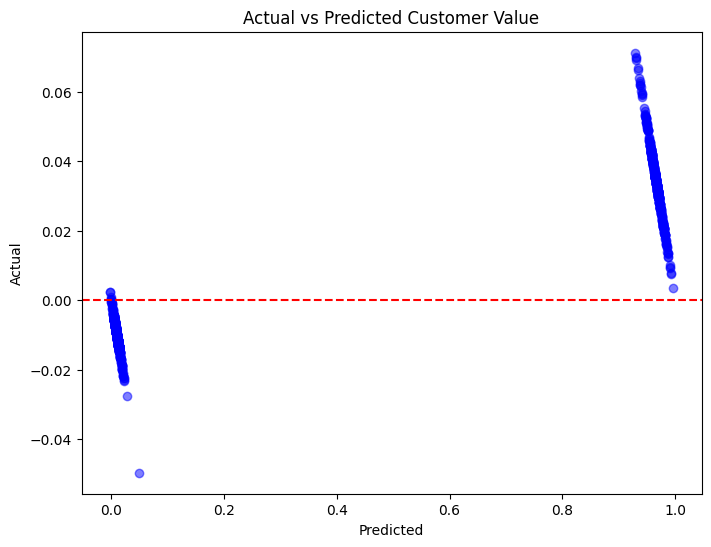

In [ ]:
y_pred = y_pred.reshape(-1)

# Calculate residuals
residuals = y_test - y_pred

# Create scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted Customer Value')
plt.show()

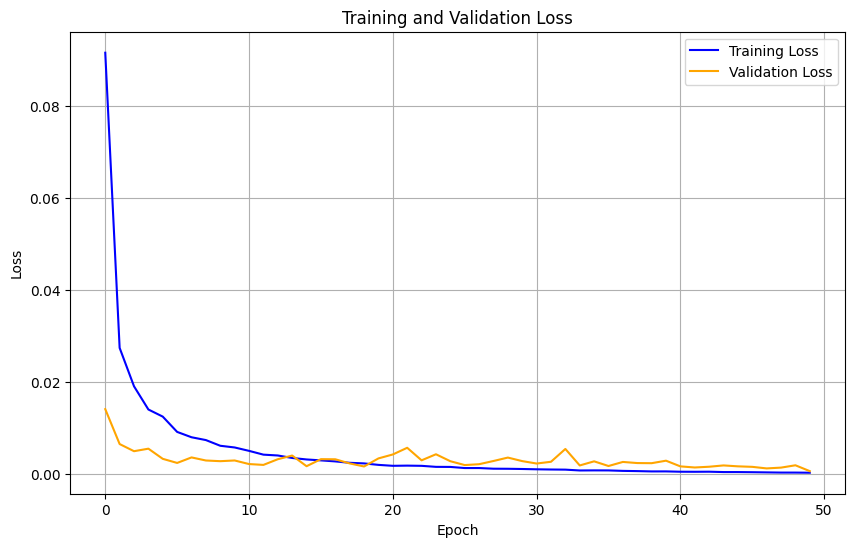

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

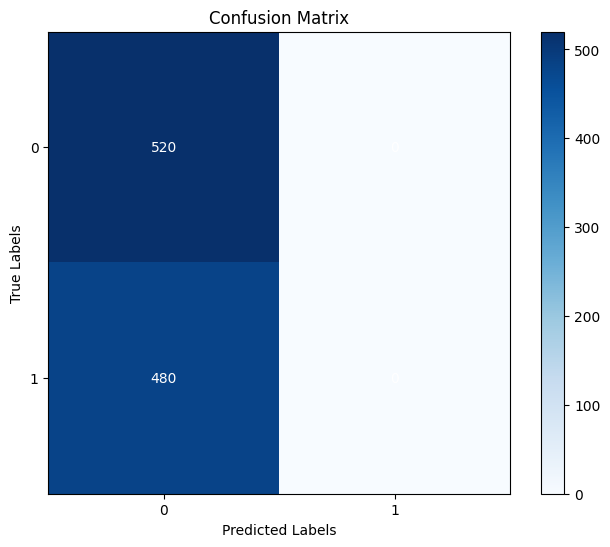

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(conf_matrix.shape[1]))
plt.yticks(np.arange(conf_matrix.shape[0]))
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()